In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv("E:/ML_FDP_Program/LP-I/assignment 5/Mall_Customers.csv")

In [5]:
print(data.columns)
print(data.shape)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
(200, 5)


In [14]:
X = data.iloc[:, [3,4]].values

[269981.28000000014]
[269981.28000000014, 181363.59595959607]
[269981.28000000014, 181363.59595959607, 106348.37306211119]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 25011.839349156595]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 25011.839349156595, 21850.16528258562]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81

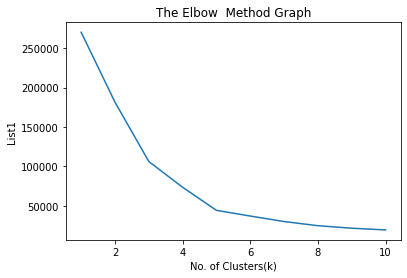

In [16]:
from sklearn.cluster import KMeans
list1 = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)
    print(list1)
plt.plot(range(1, 11), list1)
plt.title('The Elbow  Method Graph')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('List1')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
#y_kmeans = kmeans.fit_predict(X)
#print(X[y_kmeans==0, 0], X[y_kmeans==0, 1] )
#print(X[y_kmeans==1, 0], X[y_kmeans==1, 1] )
#print(X[y_kmeans==2, 0], X[y_kmeans==2, 1] )
#print(X[y_kmeans==3, 0], X[y_kmeans==3, 1] )
#print(X[y_kmeans==4, 0], X[y_kmeans==4, 1] )
y_kmeans = kmeans.fit(X)

from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.553931997444648

In [38]:
'''from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
train_data, test_data = train_test_split(X, test_size = 0.25)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
#print(y_kmeans)
x_train, x_test, y_train, y_test = train_test_split(X, y_kmeans, test_size = 0.25)
#print(test_data)
kmeans1 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
print(cross_val_score(kmeans1, x_train, y_train, cv=5, scoring='accuracy').mean())'''

0.18


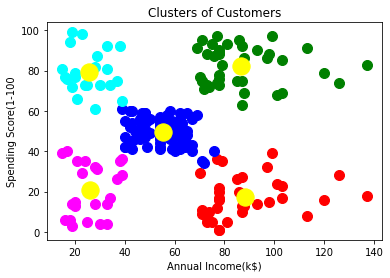

In [9]:
#6 Visualising the clusters

y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

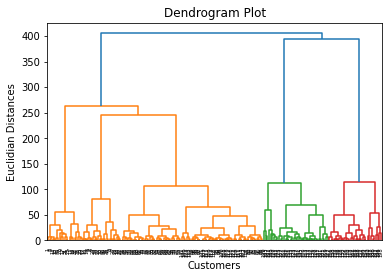

In [10]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidian Distances")
plt.xlabel("Customers")
plt.show()

In [11]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

y_kmeans = hc.fit(X)
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5529945955148897

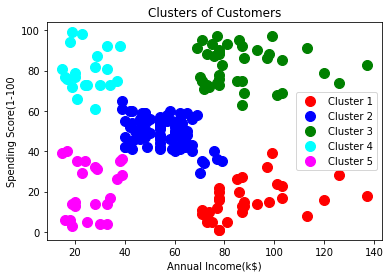

In [12]:
#visualizing the clusters
y_kmeans = hc.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()